**Import of  required libraries**

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Uploading csv file**

In [168]:
dropout = pd.read_csv('/content/dropout-ratio-2012-2015.csv')

In [169]:
dropout.head(15)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69


In [171]:
data_west_bengal = dropout[dropout['State_UT']=='West Bengal']
data_west_bengal.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
104,West Bengal,2012-13,6.88,5.71,6.3,6.29,4.16,5.18,14.95,19.41,17.3,7.81,8.49,8.13
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11


In [172]:
dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-null    object
 13  HrSecondary_Total    110 non-null    object
dtypes: object(14)
memory usage: 12.2+ KB


When we check the dropout dataset we can see that there were "NR" values in some rows, so we're going to chage them to zeros and then we will change the Dtype to numerical type



**Sanitization of data**

In [174]:
dropout = dropout.replace('NR', 0)
dropout = dropout.replace('Uppe_r_Primary', 0)

Checking the Unique data



In [175]:
for col in dropout.columns:
    print(f"\nUnique values in '{col}':")
    print(dropout[col].unique())


Unique values in 'State_UT':
['A & N Islands' 'Andhra Pradesh' 'Arunachal  Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra & Nagar Haveli'
 'Daman & Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya  Pradesh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil  Nadu' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'All India']

Unique values in 'year':
['2012-13' '2013-14' '2014-15']

Unique values in 'Primary_Boys':
['0.83' '1.35' '0.47' '3.3' '4.31' '6.57' '11.54' '15.84' '11.51' '7.02'
 '8.19' '16.07' 0 '2.38' '0.35' '4.24' '1.45' '3.08' '1.05' '1.6' '1.06'
 '1.8' '0.08' '0.63' '0.21' '0.5' '0.82' '1.48' '0.22' '5.54' '0.51'
 '0.57' '0.46' '6.8' '5.53' '6.98' '7.36' '6.89' '5.91' '3.4' '2.42'
 '2.03' '2.3' '0' '5.75' '9.91' '6.48' '0.88' '1.26' '10.24' '1

We can see that the State column has spacing mistake to clean

In [176]:
dropout['State_UT'] = dropout['State_UT'].str.strip().replace({
    'Arunachal  Pradesh': 'Arunachal Pradesh',
    'Madhya  Pradesh': 'Madhya Pradesh',
    'Tamil  Nadu': 'Tamil Nadu'
})

**Updating the columns to correct data types**

In [177]:
dropout['Primary_Boys'] = dropout['Primary_Boys'].apply(lambda x: float(x))
dropout['Primary_Girls'] = dropout['Primary_Girls'].apply(lambda x: float(x))
dropout['Primary_Total'] = dropout['Primary_Total'].apply(lambda x: float(x))

dropout['Upper Primary_Boys'] = dropout['Upper Primary_Boys'].apply(lambda x: float(x))
dropout['Upper Primary_Girls'] = dropout['Upper Primary_Girls'].apply(lambda x: float(x))
dropout['Upper Primary_Total'] = dropout['Upper Primary_Total'].apply(lambda x: float(x))

dropout['Secondary _Boys'] = dropout['Secondary _Boys'].apply(lambda x: float(x))
dropout['Secondary _Girls'] = dropout['Secondary _Girls'].apply(lambda x: float(x))
dropout['Secondary _Total'] = dropout['Secondary _Total'].apply(lambda x: float(x))

dropout['HrSecondary_Boys'] = dropout['HrSecondary_Boys'].apply(lambda x: float(x))
dropout['HrSecondary_Girls'] = dropout['HrSecondary_Girls'].apply(lambda x: float(x))
dropout['HrSecondary_Total'] = dropout['HrSecondary_Total'].apply(lambda x: float(x))

**Converting the year column to integer and segregating the years**

In [178]:
dropout[['start_year', 'end_year']] = dropout['year'].str.extract(r'(\d{4})\D+(\d{2,4})')

# Convert extracted columns to int for manipulation
dropout['start_year'] = dropout['start_year'].astype(int)
dropout['end_year'] = dropout['end_year'].astype(int)

# Fix 2-digit end years by adding century prefix from start_year
def fix_year(row):
    if row['end_year'] < 100:  # if 2-digit year
        century = row['start_year'] // 100 * 100  # e.g. 2010 // 100 * 100 = 2000
        return century + row['end_year']
    return row['end_year']

dropout['end_year'] = dropout.apply(fix_year, axis=1)

dropping of the useless column

In [179]:
dropout = dropout.drop(columns=['year'])

**Now the we have cleaned the data**
**we can check the basic info of our dataset**

In [180]:
dropout.describe()

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,start_year,end_year
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000
mean,4.293455,4.010818,4.150000,3.581909,4.169455,3.839000,17.162273,16.311455,16.761364,6.96800,4.979364,5.958273,2013.009091,2014.009091
std,4.674719,4.553512,4.601164,3.388699,3.444964,3.351027,8.931009,9.403942,9.060955,7.40457,5.468031,6.403142,0.818316,0.818316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2012.000000,2013.000000
25%,0.540000,0.590000,0.665000,0.782500,1.580000,1.200000,11.312500,9.385000,9.952500,0.05750,0.000000,0.000000,2012.000000,2013.000000
50%,2.900000,2.440000,2.885000,3.120000,3.535000,3.370000,16.105000,14.985000,15.035000,5.68000,3.880000,4.595000,2013.000000,2014.000000
75%,6.742500,5.870000,6.300000,5.422500,5.835000,5.462500,23.012500,21.682500,22.832500,11.76500,8.470000,9.380000,2014.000000,2015.000000
max,24.270000,23.930000,24.110000,19.350000,19.210000,19.280000,50.090000,49.620000,49.860000,44.38000,36.050000,40.480000,2014.000000,2015.000000


**Understanding the count of admission per state**

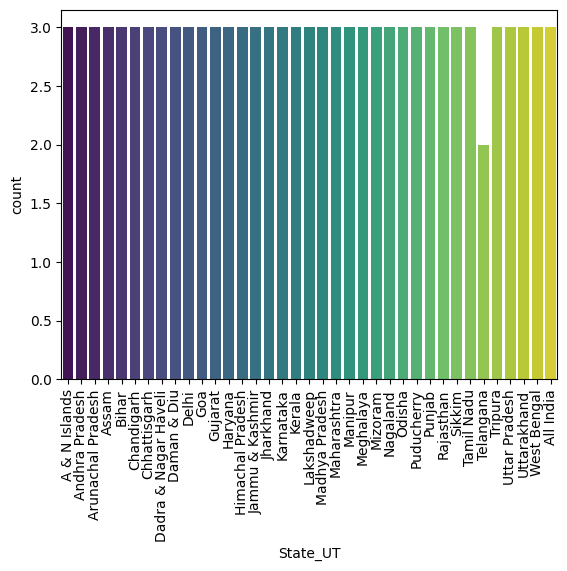

In [190]:
sns.countplot(x='State_UT', data=dropout, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [182]:
dropout.columns

Index(['State_UT', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total',
       'start_year', 'end_year'],
      dtype='object')

In [183]:
print(dropout['start_year'].unique())

[2012 2013 2014]


**As we have three unique years we can understand the data by bifurcating between total girls and boys in the dataset and showing the difference through years**

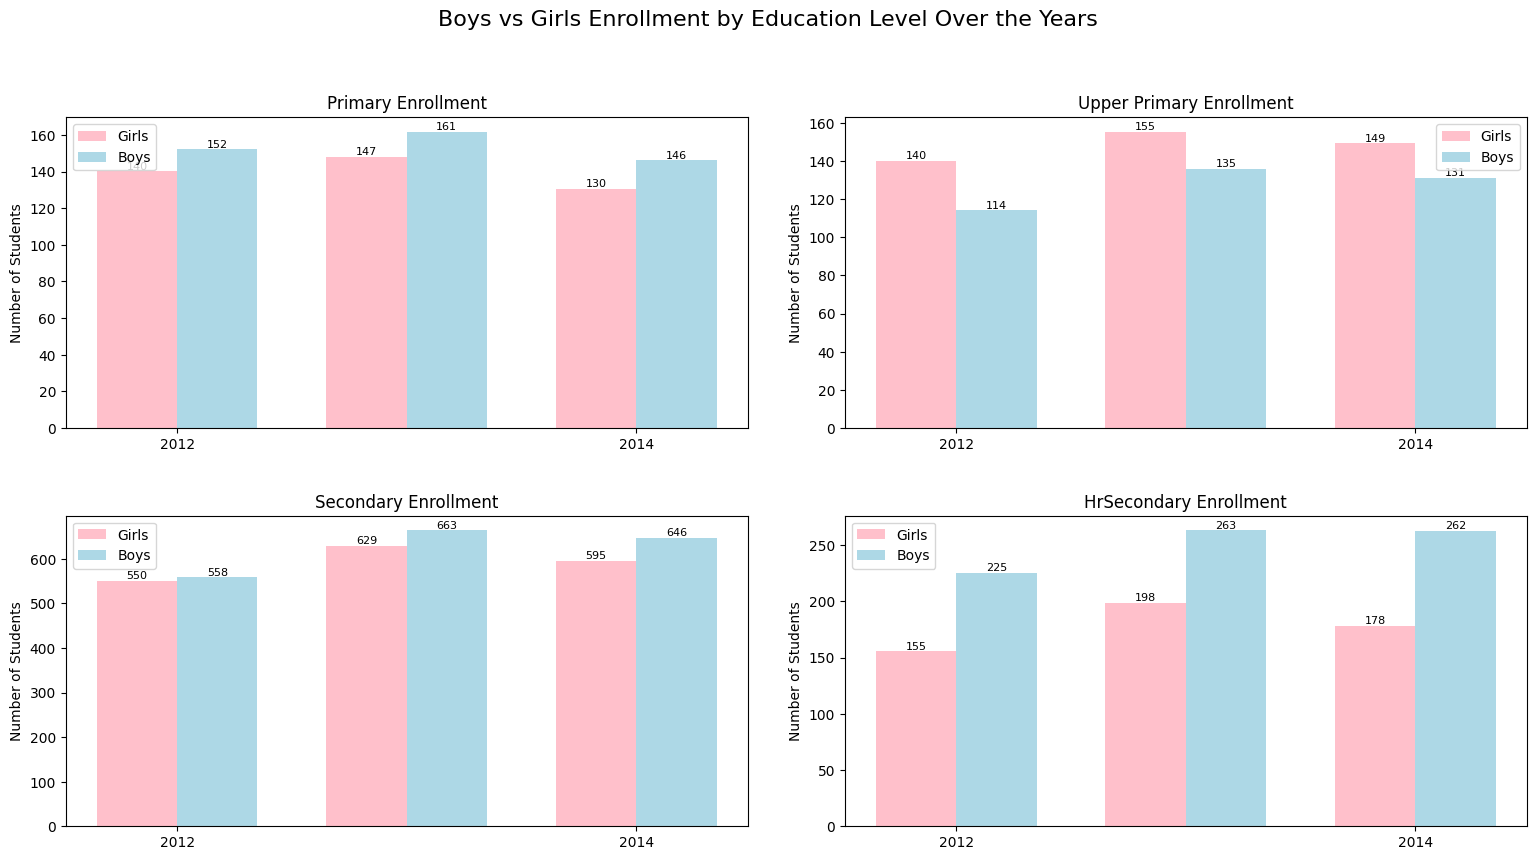

In [191]:
levels = ['Primary', 'Upper Primary', 'Secondary', 'HrSecondary']
girl_cols = ['Primary_Girls', 'Upper Primary_Girls', 'Secondary _Girls', 'HrSecondary_Girls']
boy_cols = ['Primary_Boys', 'Upper Primary_Boys', 'Secondary _Boys', 'HrSecondary_Boys']

# Make sure 'start_year' is int type
dropout['start_year'] = dropout['start_year'].astype(int)

# Group by start_year and sum the enrollment columns
grouped = dropout.groupby('start_year')[girl_cols + boy_cols].sum().reset_index()

years = grouped['start_year'].tolist()
x = np.arange(len(years))
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(16, 9))
axs = axs.flatten()

for i in range(4):
    girls = grouped[girl_cols[i]]
    boys = grouped[boy_cols[i]]

    bars_girls = axs[i].bar(x - width/2, girls, width, label='Girls', color='pink')
    bars_boys = axs[i].bar(x + width/2, boys, width, label='Boys', color='lightblue')

    # Add labels on top of each Girls bar
    for bar in bars_girls:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)

    # Add labels on top of each Boys bar
    for bar in bars_boys:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)

    # Show every 2nd year label to reduce clutter
    xtick_positions = x[::2]
    xtick_labels = [str(years[j]) for j in range(0, len(years), 2)]
    axs[i].set_xticks(xtick_positions)
    axs[i].set_xticklabels(xtick_labels)

    axs[i].set_title(f"{levels[i]} Enrollment")
    axs[i].set_ylabel("Number of Students")
    axs[i].legend()

fig.suptitle("Boys vs Girls Enrollment by Education Level Over the Years", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

**Checking outliers using boxplot**

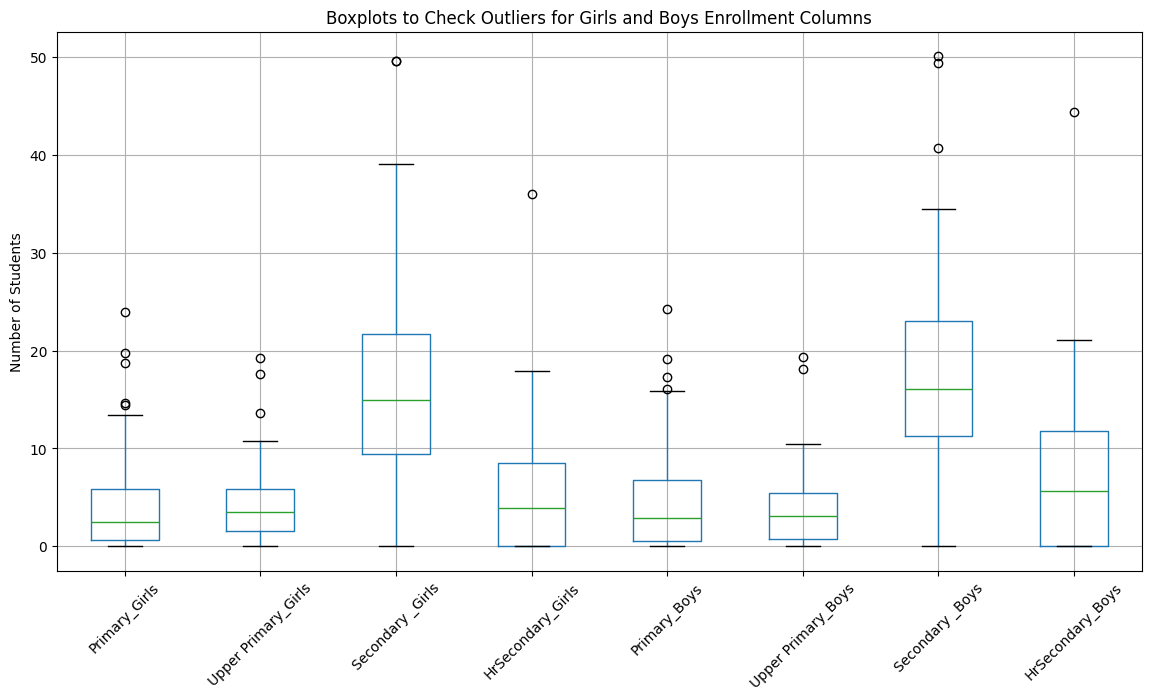

In [185]:
# Combine the columns for girls and boys
all_cols = girl_cols + boy_cols

# Set up figure size
plt.figure(figsize=(14, 7))

# Boxplot for these specific columns
dropout[all_cols].boxplot(rot=45)

plt.title("Boxplots to Check Outliers for Girls and Boys Enrollment Columns")
plt.ylabel("Number of Students")
plt.show()

In [188]:
for col in all_cols:
    Q1 = dropout[col].quantile(0.25)
    Q3 = dropout[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dropout[col] = dropout[col].clip(lower=lower_bound, upper=upper_bound)

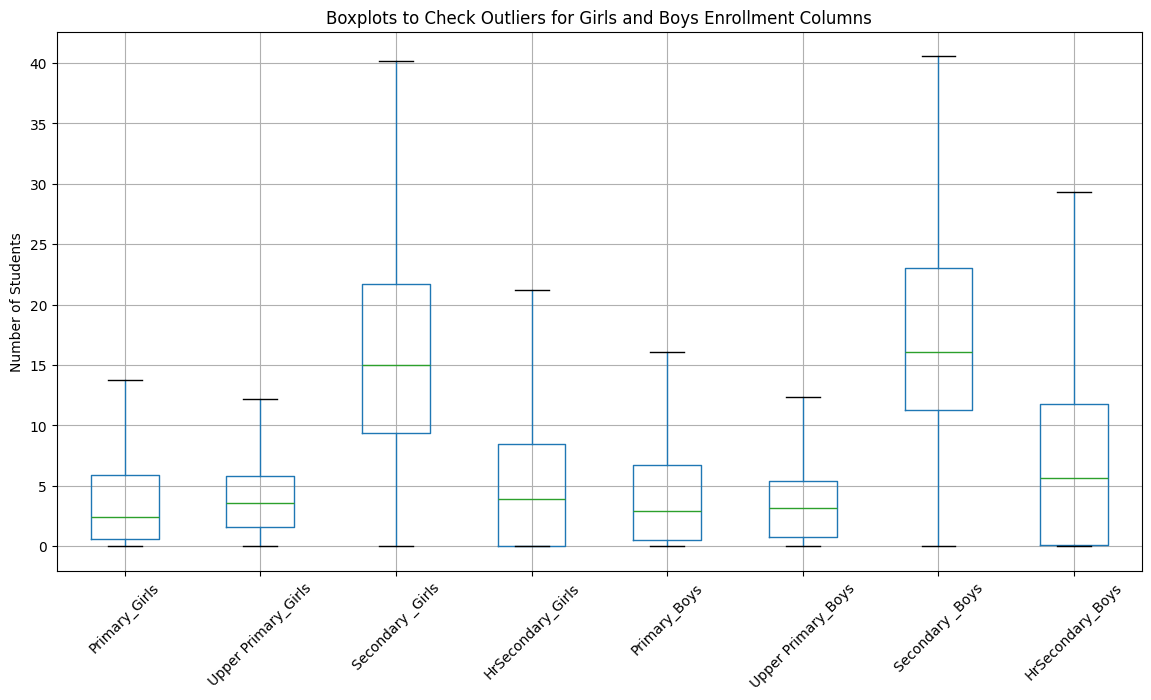

In [189]:
# Combine the columns for girls and boys
all_cols = girl_cols + boy_cols

# Set up figure size
plt.figure(figsize=(14, 7))

# Boxplot for these specific columns
dropout[all_cols].boxplot(rot=45)

plt.title("Boxplots to Check Outliers for Girls and Boys Enrollment Columns")
plt.ylabel("Number of Students")
plt.show()